<a href="https://colab.research.google.com/github/PRASANNA-416/Human-Activity-Detection-/blob/main/EDA_performed_for_Human_Activity_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 1) Class Distribution Analysis: Analyze the distribution of different classes in your image dataset.
#  Ensure that the classes are balanced, as an imbalanced dataset can lead to biased model predictions. 
#  Use techniques like oversampling, undersampling, or data augmentation to address class imbalances.



# 2) Image Visualization: Visualize sample images from each class to gain an understanding of the variations and challenges present in the dataset. 
# This can help identify potential issues like class overlap or image quality problems.





# 6) Data Preprocessing: Evaluate the quality and consistency of the image data. Check for issues like image resolution, noise, or artifacts that could affect model performance. 
# Apply preprocessing techniques such as resizing, normalization, or denoising to enhance data quality.



# 7) Dimensionality Reduction: Apply dimensionality reduction techniques like Principal Component Analysis (PCA) or t-SNE to visualize and potentially reduce the feature space.
#  This can help identify informative features or reduce the complexity of the model.



# 8) Cross-Validation Analysis: Utilize cross-validation techniques to evaluate model performance on different subsets of the data.
#  This analysis helps assess the model's generalization capability and identify potential issues like overfitting or underfitting.



.

1) Class Distribution Analysis:

In [8]:

import zipfile

zip_file_path = '/content/gdrive/MyDrive/ML/Human+Action+Recognition-20220526T101201Z-001.zip'  # Path to the ZIP file
destination_directory = '/content/gdrive/MyDrive/ML/Human Action Recognition'  # Path to the destination directory

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_directory)


In [18]:

import pandas as pd

train_csv_path = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/Training_set.csv'  # Path to the training_Set.csv file

# Read the training_Set.csv file into a DataFrame
train_df = pd.read_csv(train_csv_path)

# Get the number of entries in the DataFrame
num_entries = len(train_df)

# Print the number of entries
print("Number of entries in training_Set.csv:", num_entries)


Number of entries in training_Set.csv: 12600


In [22]:
import os
import pandas as pd

train_directory = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/train'  # Path to the train directory
train_csv_path = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/Training_set.csv'  # Path to the training_set.csv file

# Get the list of image filenames in the Train directory
train_filenames = os.listdir(train_directory)

# Read the training_set.csv file into a DataFrame
train_df = pd.read_csv(train_csv_path)

# Get the list of image filenames in the training_set.csv file
csv_filenames = train_df['filename'].tolist()

# Initialize a flag to check if all images are present in the training_set.csv
all_images_present = True

# Check if each image in Train has an entry in training_set.csv and print its label
for filename in train_filenames:
    if filename in csv_filenames:
        label = train_df.loc[train_df['filename'] == filename, 'label'].iloc[0]
        print(f"Image '{filename}' - Label: {label}")
    else:
        all_images_present = False
        print(f"Image '{filename}' is not present in training_set.csv")

# Check if all images are present in the training_set.csv
if all_images_present:
    print("All images in Train have a corresponding entry in training_set.csv. Everything is perfect!")
else:
    print("There are missing images in training_set.csv. Please check the file.")




Streaming output truncated to the last 5000 lines.
Image 'Image_4642.jpg' - Label: calling
Image 'Image_4565.jpg' - Label: sitting
Image 'Image_4696.jpg' - Label: running
Image 'Image_4570.jpg' - Label: calling
Image 'Image_4612.jpg' - Label: fighting
Image 'Image_4610.jpg' - Label: drinking
Image 'Image_4671.jpg' - Label: fighting
Image 'Image_4654.jpg' - Label: dancing
Image 'Image_4557.jpg' - Label: calling
Image 'Image_4579.jpg' - Label: fighting
Image 'Image_4705.jpg' - Label: sitting
Image 'Image_4669.jpg' - Label: sleeping
Image 'Image_4677.jpg' - Label: clapping
Image 'Image_4651.jpg' - Label: dancing
Image 'Image_4567.jpg' - Label: sleeping
Image 'Image_4675.jpg' - Label: sitting
Image 'Image_4515.jpg' - Label: calling
Image 'Image_4561.jpg' - Label: hugging
Image 'Image_4543.jpg' - Label: using_laptop
Image 'Image_4697.jpg' - Label: eating
Image 'Image_4658.jpg' - Label: drinking
Image 'Image_4673.jpg' - Label: sitting
Image 'Image_4667.jpg' - Label: sleeping
Image 'Image_454

In [24]:
import os
import pandas as pd
import random
import shutil

train_directory = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/train'
test_directory = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/test'
train_csv_path = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/Training_set.csv'
test_csv_path = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/Testing_set.csv'

# Define the number of images to transfer
total_images = 2520

# Define the class labels and their respective counts
class_counts = {
    'fighting': 168,
    'calling': 168,
    'sitting': 168,
    'laughing': 168,
    'clapping': 168,
    'cycling': 168,
    'listening_to_music': 168,
    'eating': 168,
    'texting': 168,
    'sleeping': 168,
    'dancing': 168,
    'hugging': 168,
    'running': 168,
    'using_laptop': 168,
    'drinking': 168
}

# Create the Test directory if it doesn't exist
if not os.path.exists(test_directory):
    os.makedirs(test_directory)
    print("Test directory created.")

# Read the training_Set.csv file into a DataFrame
train_df = pd.read_csv(train_csv_path)

# Get the unique filenames from the training_Set.csv file
unique_filenames = train_df['filename'].unique()

# Randomly select filenames to transfer
selected_filenames = random.sample(list(unique_filenames), total_images)

# Initialize lists to store the transferred filenames and labels
transfer_filenames = []
transfer_labels = []

# Transfer images from Train to Test
for filename in selected_filenames:
    src_path = os.path.join(train_directory, filename)
    dst_path = os.path.join(test_directory, filename)
    shutil.move(src_path, dst_path)
    transfer_filenames.append(filename)
    transfer_labels.append(train_df[train_df['filename'] == filename]['label'].values[0])

# Create the testing_set.csv file
test_df = pd.DataFrame({'filename': transfer_filenames, 'label': transfer_labels})
test_df.to_csv(test_csv_path, index=False)
print("Transfer complete. Total images transferred:", len(transfer_filenames))
print("testing_set.csv file created.")

# Remove transferred images from Train folder
for filename in transfer_filenames:
    file_path = os.path.join(train_directory, filename)
    if os.path.exists(file_path):
        os.remove(file_path)

# Remove transferred entries from training_set.csv
train_df = train_df[~train_df['filename'].isin(transfer_filenames)]
train_df.to_csv(train_csv_path, index=False)
print("Transferred images removed from the train folder and training_set.csv updated.")


Test directory created.
Transfer complete. Total images transferred: 2520
testing_set.csv file created.
Transferred images removed from the train folder and training_set.csv updated.


In [26]:
import pandas as pd
import os

train_directory = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/train'
test_directory = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/test'
train_csv_path = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/Training_set.csv'
test_csv_path = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/Testing_set.csv'

# Read the training_set.csv file into a DataFrame
train_df = pd.read_csv(train_csv_path)

# Check if each image in the train folder has a corresponding entry in the training_set.csv file
train_images = os.listdir(train_directory)
missing_train_images = []
for image in train_images:
    if image not in train_df['filename'].values:
        missing_train_images.append(image)

# Read the testing_set.csv file into a DataFrame
test_df = pd.read_csv(test_csv_path)

# Check if each image in the test folder has a corresponding entry in the testing_set.csv file
test_images = os.listdir(test_directory)
missing_test_images = []
for image in test_images:
    if image not in test_df['filename'].values:
        missing_test_images.append(image)

# Print the results
if not missing_train_images:
    print("All images in the train folder have a corresponding entry in the training_set.csv file.")
else:
    print("The following images in the train folder are missing from the training_set.csv file:")
    print(missing_train_images)

if not missing_test_images:
    print("All images in the test folder have a corresponding entry in the testing_set.csv file.")
else:
    print("The following images in the test folder are missing from the testing_set.csv file:")
    print(missing_test_images)


All images in the train folder have a corresponding entry in the training_set.csv file.
All images in the test folder have a corresponding entry in the testing_set.csv file.


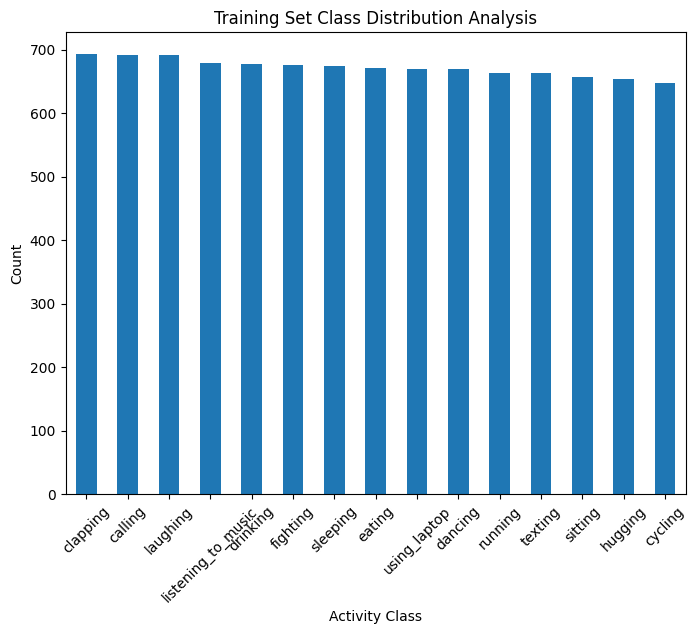

Class Counts:
clapping              693
calling               691
laughing              691
listening_to_music    679
drinking              678
fighting              676
sleeping              675
eating                671
using_laptop          670
dancing               670
running               664
texting               663
sitting               657
hugging               654
cycling               648
Name: label, dtype: int64


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the training set CSV file
train_csv_path = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/Training_set.csv'
train_df = pd.read_csv(train_csv_path)

# Count the occurrences of each activity class
class_counts = train_df['label'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.xlabel('Activity Class')
plt.ylabel('Count')
plt.title('Training Set Class Distribution Analysis')
plt.xticks(rotation=45)
plt.show()

# Print the count of each class
print("Class Counts:")
print(class_counts)


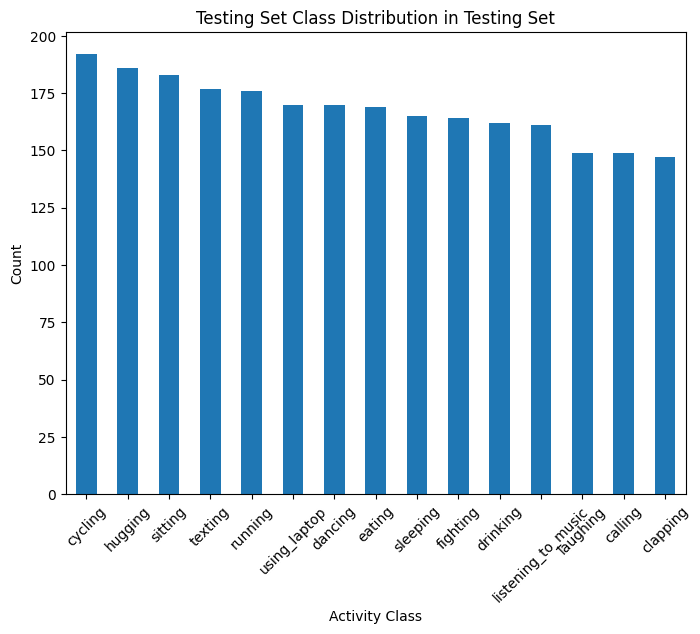

Class Counts in Testing Set:
cycling               192
hugging               186
sitting               183
texting               177
running               176
using_laptop          170
dancing               170
eating                169
sleeping              165
fighting              164
drinking              162
listening_to_music    161
laughing              149
calling               149
clapping              147
Name: label, dtype: int64


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the testing set CSV file
test_csv_path = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/Testing_set.csv'
test_df = pd.read_csv(test_csv_path)

# Count the occurrences of each activity class in the testing set
class_counts_test = test_df['label'].value_counts()

# Plot the class distribution in the testing set
plt.figure(figsize=(8, 6))
class_counts_test.plot(kind='bar')
plt.xlabel('Activity Class')
plt.ylabel('Count')
plt.title('Testing Set Class Distribution in Testing Set')
plt.xticks(rotation=45)
plt.show()

# Print the count of each class in the testing set
print("Class Counts in Testing Set:")
print(class_counts_test)


In [29]:
train_directory = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/train'
test_directory = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/test'

# Count the number of images in the training set
train_count = len(os.listdir(train_directory))

# Count the number of images in the testing set
test_count = len(os.listdir(test_directory))

# Print the counts
print("Total Training Count:", train_count)
print("Total Testing Count:", test_count)

Total Training Count: 10080
Total Testing Count: 2520


In [32]:
import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the original train images folder
train_folder = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/train'

# Path to the augmented train images folder
train_augmented_folder = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/train_augmented/'

# Path to the original training_set.csv file
training_set_csv_path = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/Training_set.csv'

# Path to the augmented training_Set_augmented.csv file
training_set_augmented_csv_path = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/Training_Set_augmented.csv'

# Create the augmented images folder if it doesn't exist
if not os.path.exists(train_augmented_folder):
    os.makedirs(train_augmented_folder)
    print("Augmented images folder created.")

# Load the training_set.csv file
train_df = pd.read_csv(training_set_csv_path)

# Initialize the augmented data list
augmented_data = []

# Augmentation parameters
augmentation_count = 500  # Number of augmented images per class

# Image augmentation generator
data_generator = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=45,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Iterate over each class
for class_name in class_counts.index:
    # Create the class-specific augmented images folder
    class_augmented_folder = os.path.join(train_augmented_folder, class_name)
    if not os.path.exists(class_augmented_folder):
        os.makedirs(class_augmented_folder)

    # Get the filenames of images belonging to the current class
    filenames = train_df[train_df['label'] == class_name]['filename']

    # Select random images for augmentation
    selected_images = np.random.choice(filenames, augmentation_count, replace=True)

    # Perform augmentation and save the augmented images
    for image_filename in tqdm(selected_images, desc=f"Augmenting {class_name}", unit="image"):
        # Read the image
        image_path = os.path.join(train_folder, image_filename)
        image = cv2.imread(image_path)

        # Generate augmented images using the data generator
        augmented_images = data_generator.flow(np.expand_dims(image, axis=0), batch_size=1)

        # Generate the augmented filename
        augmented_filename = f"{os.path.splitext(image_filename)[0]}(1){os.path.splitext(image_filename)[1]}"
        augmented_filepath = os.path.join(class_augmented_folder, augmented_filename)

        # Check if the augmented filename already exists in train or train_augmented folder
        while os.path.exists(os.path.join(train_folder, augmented_filename)) or os.path.exists(augmented_filepath):
            # Append (1) to the filename
            filename_without_extension = os.path.splitext(augmented_filename)[0]
            file_extension = os.path.splitext(augmented_filename)[1]
            augmented_filename = f"{filename_without_extension}(1){file_extension}"
            augmented_filepath = os.path.join(class_augmented_folder, augmented_filename)

        # Save the augmented image
        augmented_image = next(augmented_images)[0]
        cv2.imwrite(augmented_filepath, augmented_image)

        # Append the augmented image details to the augmented data list
        augmented_data.append({'filename': augmented_filename, 'label': class_name})

# Create the augmented training_Set_augmented.csv file
augmented_df = pd.DataFrame(augmented_data)
augmented_df.to_csv(training_set_augmented_csv_path, index=False)

print("Image augmentation completed.")

# Load the augmented training_Set_augmented.csv file
augmented_set_df = pd.read_csv(training_set_augmented_csv_path)

# Print the content of the augmented training set
print(augmented_set_df)

# Count the number of images in the train_augmented folder under each class
class_counts_augmented = augmented_set_df['label'].value_counts()
print(class_counts_augmented)



Augmenting cycling: 100%|██████████| 500/500 [00:16<00:00, 30.75image/s]


Image augmentation completed.
                  filename     label
0         Image_308(1).jpg  clapping
1        Image_2314(1).jpg  clapping
2       Image_10517(1).jpg  clapping
3       Image_10810(1).jpg  clapping
4        Image_4163(1).jpg  clapping
...                    ...       ...
7495     Image_5118(1).jpg   cycling
7496     Image_1401(1).jpg   cycling
7497      Image_427(1).jpg   cycling
7498  Image_3287(1)(1).jpg   cycling
7499  Image_2591(1)(1).jpg   cycling

[7500 rows x 2 columns]
clapping              500
calling               500
laughing              500
listening_to_music    500
drinking              500
fighting              500
sleeping              500
eating                500
using_laptop          500
dancing               500
running               500
texting               500
sitting               500
hugging               500
cycling               500
Name: label, dtype: int64


In [33]:
import os
import pandas as pd

# Set the paths
train_augmented_folder = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/train_augmented'
training_set_augmented_csv_path = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/Training_Set_augmented.csv'

# Load the training_set_augmented.csv file
training_set_augmented_df = pd.read_csv(training_set_augmented_csv_path)

# Get the list of class folders in train_augmented folder
class_folders = os.listdir(train_augmented_folder)

# Flag variable to track inconsistencies
flag = True

# Iterate over each class folder in train_augmented folder
for class_folder in class_folders:
    class_path = os.path.join(train_augmented_folder, class_folder)
    
    # Iterate over each image file in the class folder
    for filename in os.listdir(class_path):
        image_path = os.path.join(class_path, filename)
        
        # Check if the image filename is present in training_set_augmented.csv
        if filename not in training_set_augmented_df['filename'].values:
            print(f"Image filename not found in training_set_augmented.csv: {filename}")
            flag = False

if flag:
    print("All image filenames in train_augmented folder are present in training_set_augmented.csv.")
else:
    print("There are inconsistencies between train_augmented folder and training_set_augmented.csv.")


All image filenames in train_augmented folder are present in training_set_augmented.csv.


In [37]:
import os
import shutil
import pandas as pd

# Paths
train_folder = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/train'
train_augmented_folder = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/train_augmented'
final_train_folder = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/Final_train'
final_training_set_csv_path = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/Final_training_set.csv'
training_set_csv_path = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/Training_set.csv'
training_set_augmented_csv_path = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/Training_Set_augmented.csv'

# Create the Final_train folder if it doesn't exist
if not os.path.exists(final_train_folder):
    os.makedirs(final_train_folder)
    print("Final_train folder created.")

# Copy images from train folder to Final_train folder
for file in os.listdir(train_folder):
    source_path = os.path.join(train_folder, file)
    destination_path = os.path.join(final_train_folder, file)
    if os.path.isfile(source_path):  # Check if the source is a file
        shutil.copyfile(source_path, destination_path)

# Copy images from subfolders within train_augmented to Final_train folder
for class_folder in os.listdir(train_augmented_folder):
    source_class_folder = os.path.join(train_augmented_folder, class_folder)
    destination_class_folder = os.path.join(final_train_folder, class_folder)
    if os.path.isdir(source_class_folder):  # Check if the source class folder exists
        if not os.path.exists(destination_class_folder):
            os.makedirs(destination_class_folder)
        for file in os.listdir(source_class_folder):
            source_path = os.path.join(source_class_folder, file)
            destination_path = os.path.join(destination_class_folder, file)
            if os.path.isfile(source_path):  # Check if the source is a file
                shutil.copyfile(source_path, destination_path)

print("Final_train folder created with merged images.")

# Load training_set.csv and training_set_augmented.csv
training_set_df = pd.read_csv(training_set_csv_path)
training_set_augmented_df = pd.read_csv(training_set_augmented_csv_path)

# Combine the contents of training_set.csv and training_set_augmented.csv
final_training_set_df = pd.concat([training_set_df, training_set_augmented_df], ignore_index=True)

# Save the combined DataFrame to Final_training_set.csv
final_training_set_df.to_csv(final_training_set_csv_path, index=False)

print("Final_training_set.csv created with combined content.")




Final_train folder created.
Final_train folder created with merged images.
Final_training_set.csv created with combined content.


In [40]:

import os
import pandas as pd

# Path to the train folder
train_folder = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/train'

# Path to the train_augmented folder
train_augmented_folder = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/train_augmented'

# Path to the training_set.csv file
training_set_csv_path = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/Training_set.csv'

# Path to the Training_Set_augmented.csv file
training_set_augmented_csv_path = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/Training_Set_augmented.csv'

# Count images in train folder
train_image_count = sum(len(files) for _, _, files in os.walk(train_folder))

# Count images in train_augmented folder
train_augmented_image_count = sum(len(files) for _, _, files in os.walk(train_augmented_folder))

# Count entries in training_set.csv
training_set_csv_df = pd.read_csv(training_set_csv_path)
training_set_entry_count = len(training_set_csv_df)

# Count entries in Training_Set_augmented.csv
training_set_augmented_csv_df = pd.read_csv(training_set_augmented_csv_path)
training_set_augmented_entry_count = len(training_set_augmented_csv_df)

# Print the counts
print("Number of images in train folder:", train_image_count)
print("Number of entries in training_set.csv:", training_set_entry_count)
print("Number of images in train_augmented folder:", train_augmented_image_count)
print("Number of entries in Training_Set_augmented.csv:", training_set_augmented_entry_count)


Number of images in train folder: 10080
Number of entries in training_set.csv: 10080
Number of images in train_augmented folder: 7500
Number of entries in Training_Set_augmented.csv: 7500


In [42]:
import os
import shutil

# Path to the train folder
train_folder = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/train'

# Path to the FINAL_TRAIN folder
final_train_folder = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/FINAL_TRAIN'

# Create the FINAL_TRAIN folder if it doesn't exist
if not os.path.exists(final_train_folder):
    os.makedirs(final_train_folder)
    print("FINAL_TRAIN folder created.")

# Copy images from train folder to FINAL_TRAIN folder
for file in os.listdir(train_folder):
    source_path = os.path.join(train_folder, file)
    destination_path = os.path.join(final_train_folder, file)
    if os.path.isfile(source_path):  # Check if the source is a file
        shutil.copyfile(source_path, destination_path)

print("Images from the train folder are copied to the FINAL_TRAIN folder.")



FINAL_TRAIN folder created.
Images from the train folder are copied to the FINAL_TRAIN folder.


In [44]:
import os
import shutil

# Path to the train_augmented folder
train_augmented_folder = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/train_augmented'

# Path to the FINAL_TRAIN folder
final_train_folder = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/FINAL_TRAIN'

# Create the FINAL_TRAIN folder if it doesn't exist
if not os.path.exists(final_train_folder):
    os.makedirs(final_train_folder)
    print("FINAL_TRAIN folder created.")

# Copy images from subfolders within train_augmented to FINAL_TRAIN folder
for folder in os.listdir(train_augmented_folder):
    source_folder = os.path.join(train_augmented_folder, folder)
    if os.path.isdir(source_folder):  # Check if the source is a directory
        for file in os.listdir(source_folder):
            source_path = os.path.join(source_folder, file)
            destination_path = os.path.join(final_train_folder, file)
            if os.path.isfile(source_path):  # Check if the source is a file
                shutil.copyfile(source_path, destination_path)

print("Images from the subfolders within train_augmented are copied to the FINAL_TRAIN folder.")



Images from the subfolders within train_augmented are copied to the FINAL_TRAIN folder.


In [45]:
import os

# Path to the FINAL_TRAIN folder
final_train_folder = '/content/gdrive/MyDrive/ML/Human Action Recognition/Human Action Recognition/FINAL_TRAIN'

# Count the number of images in the FINAL_TRAIN folder
num_images = len([file for file in os.listdir(final_train_folder) if os.path.isfile(os.path.join(final_train_folder, file))])

print("Number of images in FINAL_TRAIN:", num_images)


Number of images in FINAL_TRAIN: 17580
